In [ ]:
pip install numpy keras


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from time import time
from tensorflow.keras.datasets import imdb
from keras.utils import to_categorical


In [ ]:
#Basic Parameters

# Set parameters
max_features = 500  # Number of most frequent words to consider
maxlen = 50  # Maximum sequence length
batch_size = 32
num_classes = 3

# Load and preprocess the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


17464789/17464789 [==============================] - 0s 0us/step


Epoch 1/5
782/782 [==============================] - 20s 22ms/step - loss: 0.6730 - accuracy: 0.5797 - val_loss: 0.6495 - val_accuracy: 0.6482
Epoch 2/5
782/782 [==============================] - 32s 41ms/step - loss: 0.5834 - accuracy: 0.6943 - val_loss: 0.5560 - val_accuracy: 0.7258
Epoch 3/5
782/782 [==============================] - 20s 25ms/step - loss: 0.5358 - accuracy: 0.7334 - val_loss: 0.5559 - val_accuracy: 0.7222
Epoch 4/5
782/782 [==============================] - 15s 19ms/step - loss: 0.5178 - accuracy: 0.7427 - val_loss: 0.5562 - val_accuracy: 0.7200
Epoch 5/5
782/782 [==============================] - 15s 19ms/step - loss: 0.5131 - accuracy: 0.7475 - val_loss: 0.5402 - val_accuracy: 0.7337


<Figure size 1200x500 with 0 Axes>

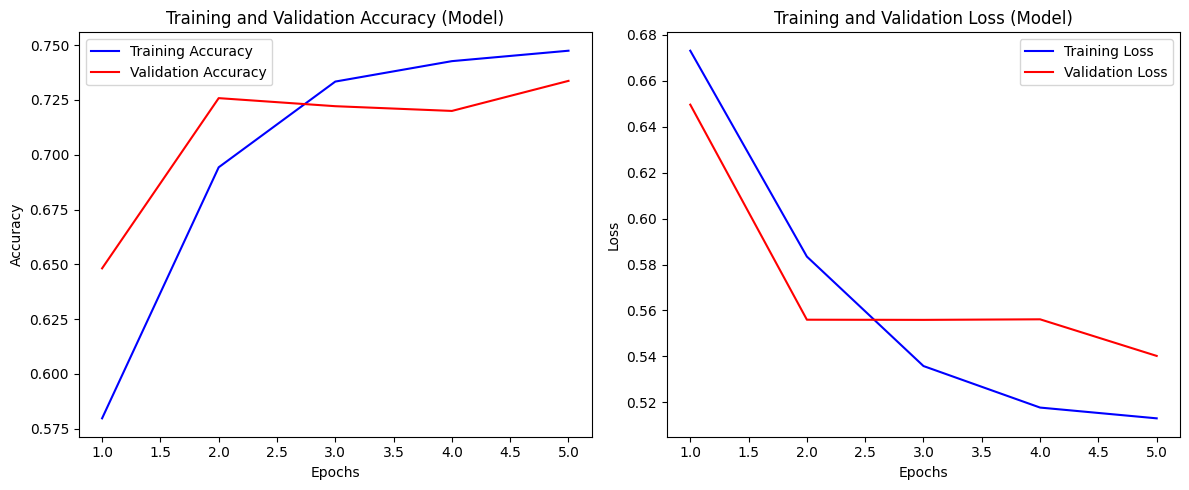

NameError: ignored

Total time taken to train the model: 102.55 seconds


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))  # Word embedding layer
model.add(SimpleRNN(32))  # Simple RNN layer
model.add(Dense(64, activation='relu'))  # Dense layer with ReLU activation
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure time taken for training the model
start_time = time()

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 5))

# Plotting training history
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('Training and Validation Loss (Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate and print the total time taken for the model
end_time = time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time:.2f} seconds")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Model - Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

In [ ]:
pip install gensim

In [ ]:
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
import time


In [ ]:
#Preprocessing- Tokenization, Removing noise/ stop words, stemming, lemmatization
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    porter_stemmer = PorterStemmer()
    words = [lemmatizer.lemmatize(porter_stemmer.stem(word)) for word in words]
    return words


x_train_text = [' '.join([str(idx) for idx in sequence]) for sequence in x_train]
x_test_text = [' '.join([str(idx) for idx in sequence]) for sequence in x_test]

x_train_preprocessed = [preprocess_text(text) for text in x_train_text]
x_test_preprocessed = [preprocess_text(text) for text in x_test_text]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=x_train_preprocessed, vector_size=50, window=5, min_count=1, workers=4)

# Create an embedding matrix
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train_text + x_test_text)

word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_features, 50))
for word, i in word_index.items():
    if i < max_features and word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

x_train_processed = tokenizer.texts_to_sequences(x_train_text)
x_test_processed = tokenizer.texts_to_sequences(x_test_text)

x_train_processed = sequence.pad_sequences(x_train_processed, maxlen=maxlen)
x_test_processed = sequence.pad_sequences(x_test_processed, maxlen=maxlen)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Epoch 1/5
782/782 [==============================] - 123s 154ms/step - loss: 0.6735 - accuracy: 0.5849 - val_loss: 0.5948 - val_accuracy: 0.6876
Epoch 2/5
782/782 [==============================] - 112s 143ms/step - loss: 0.5892 - accuracy: 0.6954 - val_loss: 0.5764 - val_accuracy: 0.7156
Epoch 3/5
782/782 [==============================] - 114s 145ms/step - loss: 0.5713 - accuracy: 0.7062 - val_loss: 0.5446 - val_accuracy: 0.7296
Epoch 4/5
782/782 [==============================] - 114s 146ms/step - loss: 0.5232 - accuracy: 0.7451 - val_loss: 0.5420 - val_accuracy: 0.7273
Epoch 5/5
782/782 [==============================] - 114s 146ms/step - loss: 0.5079 - accuracy: 0.7510 - val_loss: 0.5401 - val_accuracy: 0.7264
Total time taken to train the model: 10.41 minutes


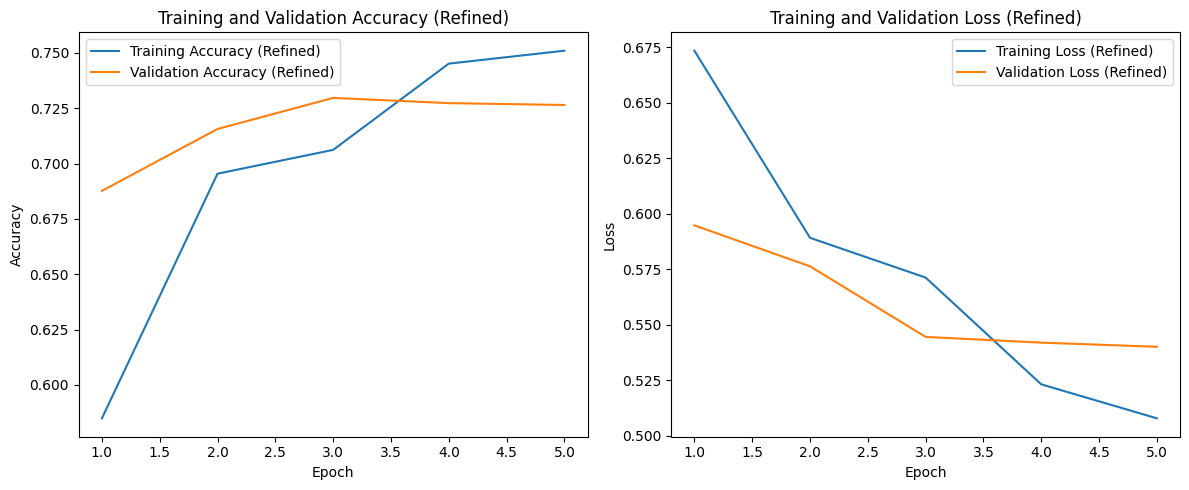

In [ ]:
# Single Layer of RNN without using any activation function

# Build the refined model
model_refined = Sequential()
model_refined.add(Embedding(max_features, 32, input_length=maxlen))  # Specify input_length
model_refined.add(SimpleRNN(32))
model_refined.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax for multi-class classification

model_refined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure time taken for training
start_time = time.time()

# Train the refined model
history_refined = model_refined.fit(x_train_processed, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test_processed, y_test))

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plotting training history
epochs_refined = range(1, len(history_refined.history['accuracy']) + 1)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training history for the refined model - Accuracy
axs[0].plot(epochs_refined, history_refined.history['accuracy'], label='Training Accuracy (Refined)')
axs[0].plot(epochs_refined, history_refined.history['val_accuracy'], label='Validation Accuracy (Refined)')
axs[0].set_title('Training and Validation Accuracy (Refined)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training history for the refined model - Loss
axs[1].plot(epochs_refined, history_refined.history['loss'], label='Training Loss (Refined)')
axs[1].plot(epochs_refined, history_refined.history['val_loss'], label='Validation Loss (Refined)')
axs[1].set_title('Training and Validation Loss (Refined)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# Evaluate the refined model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)

# Print the evaluation results
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")


In [ ]:
# Evaluate the refined model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)

# Print the evaluation results
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")


782/782 [==============================] - 32s 41ms/step - loss: 0.5401 - accuracy: 0.7264
Refined Model - Test loss: 0.5401, Test accuracy: 0.7264


Epoch 1/5
782/782 [==============================] - 104s 129ms/step - loss: 0.6854 - accuracy: 0.5420 - val_loss: 0.6672 - val_accuracy: 0.5803
Epoch 2/5
782/782 [==============================] - 115s 147ms/step - loss: 0.6411 - accuracy: 0.6163 - val_loss: 0.6094 - val_accuracy: 0.6580
Epoch 3/5
782/782 [==============================] - 114s 145ms/step - loss: 0.5643 - accuracy: 0.7117 - val_loss: 0.5499 - val_accuracy: 0.7317
Epoch 4/5
782/782 [==============================] - 114s 146ms/step - loss: 0.5365 - accuracy: 0.7368 - val_loss: 0.5348 - val_accuracy: 0.7424
Epoch 5/5
782/782 [==============================] - 113s 145ms/step - loss: 0.5323 - accuracy: 0.7418 - val_loss: 0.5400 - val_accuracy: 0.7353
Total time taken to train the model: 9.43 minutes


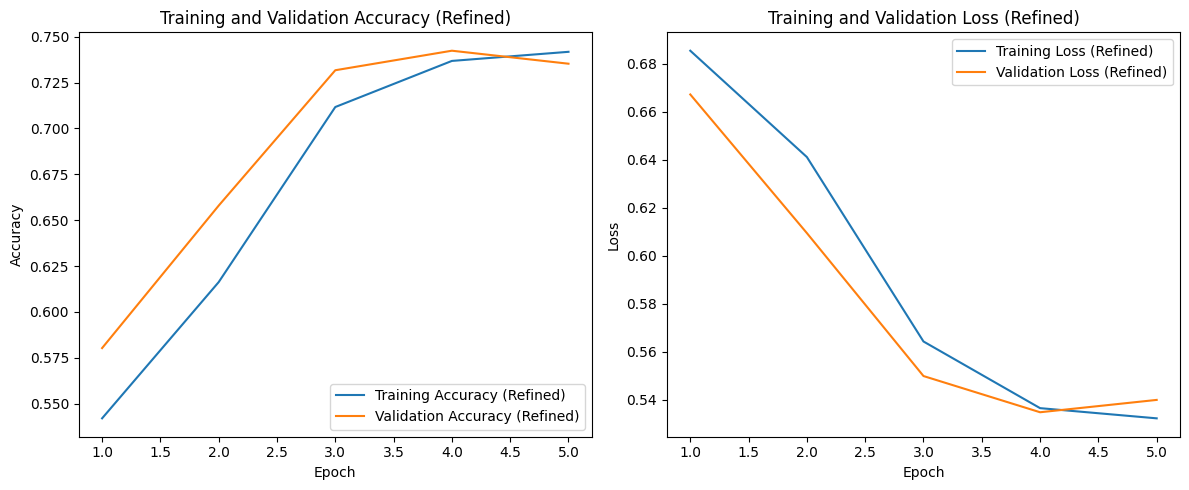

782/782 [==============================] - 36s 46ms/step - loss: 0.5400 - accuracy: 0.7353
Refined Model - Test loss: 0.5400, Test accuracy: 0.7353


In [ ]:
# Build the refined model with sigmoid activation
model_refined = Sequential()
model_refined.add(Embedding(max_features, 32, input_length=maxlen))
model_refined.add(SimpleRNN(32, activation='sigmoid'))
model_refined.add(Dense(num_classes, activation='softmax'))

model_refined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure time taken for training
start_time = time.time()

# Train the refined model
history_refined = model_refined.fit(x_train_processed, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test_processed, y_test))

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plotting training history
epochs_refined = range(1, len(history_refined.history['accuracy']) + 1)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training history for the refined model - Accuracy
axs[0].plot(epochs_refined, history_refined.history['accuracy'], label='Training Accuracy')
axs[0].plot(epochs_refined, history_refined.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training history for the refined model - Loss
axs[1].plot(epochs_refined, history_refined.history['loss'], label='Training Loss')
axs[1].plot(epochs_refined, history_refined.history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# Evaluate the refined model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)

# Print the evaluation results
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")

Epoch 1/5
782/782 [==============================] - 152s 188ms/step - loss: 0.6672 - accuracy: 0.5960 - val_loss: 0.5770 - val_accuracy: 0.7188
Epoch 2/5
782/782 [==============================] - 145s 186ms/step - loss: 0.5417 - accuracy: 0.7322 - val_loss: 0.5204 - val_accuracy: 0.7413
Epoch 3/5
782/782 [==============================] - 127s 162ms/step - loss: 0.5072 - accuracy: 0.7524 - val_loss: 0.5024 - val_accuracy: 0.7546
Epoch 4/5
782/782 [==============================] - 114s 146ms/step - loss: 0.4875 - accuracy: 0.7606 - val_loss: 0.5469 - val_accuracy: 0.7193
Epoch 5/5
782/782 [==============================] - 112s 144ms/step - loss: 0.4746 - accuracy: 0.7691 - val_loss: 0.5097 - val_accuracy: 0.7576
Total time taken to train the model: 11.45 minutes


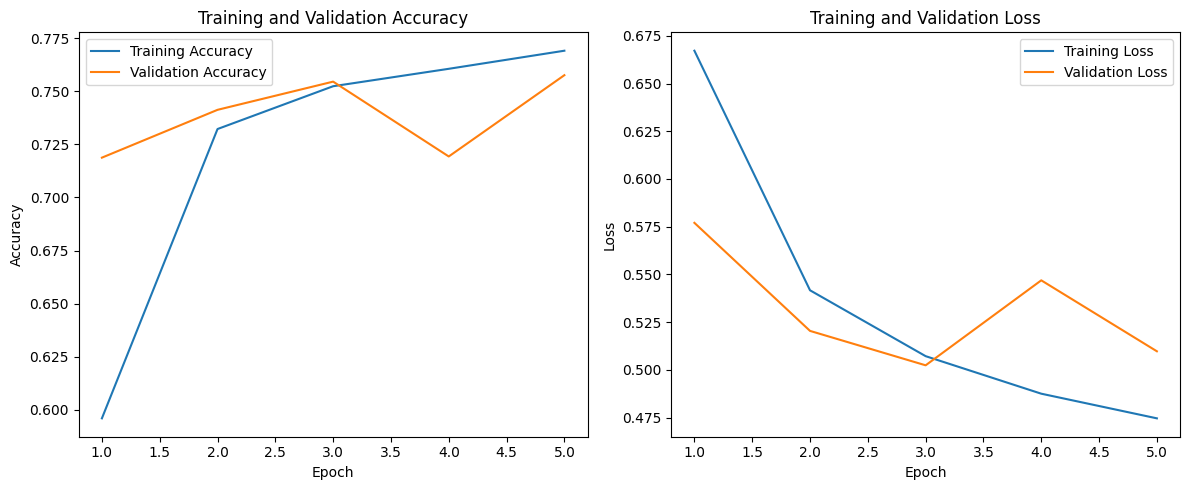

782/782 [==============================] - 24s 31ms/step - loss: 0.5097 - accuracy: 0.7576
Refined Model - Test loss: 0.5097, Test accuracy: 0.7576


In [ ]:
# Build the refined model with tanh activation
model_refined = Sequential()
model_refined.add(Embedding(max_features, 32, input_length=maxlen))
model_refined.add(SimpleRNN(32, activation='tanh'))
model_refined.add(Dense(num_classes, activation='softmax'))

model_refined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure time taken for training
start_time = time.time()

# Train the refined model
history_refined = model_refined.fit(x_train_processed, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test_processed, y_test))

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plotting training history
epochs_refined = range(1, len(history_refined.history['accuracy']) + 1)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training history for the refined model - Accuracy
axs[0].plot(epochs_refined, history_refined.history['accuracy'], label='Training Accuracy')
axs[0].plot(epochs_refined, history_refined.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training history for the refined model - Loss
axs[1].plot(epochs_refined, history_refined.history['loss'], label='Training Loss')
axs[1].plot(epochs_refined, history_refined.history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# Evaluate the refined model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)

# Print the evaluation results
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")

Epoch 1/5
782/782 [==============================] - 98s 122ms/step - loss: 0.6361 - accuracy: 0.6294 - val_loss: 0.5815 - val_accuracy: 0.6991
Epoch 2/5
782/782 [==============================] - 140s 180ms/step - loss: 0.5112 - accuracy: 0.7446 - val_loss: 0.5034 - val_accuracy: 0.7452
Epoch 3/5
782/782 [==============================] - 108s 138ms/step - loss: 0.4822 - accuracy: 0.7639 - val_loss: 0.4904 - val_accuracy: 0.7629
Epoch 4/5
782/782 [==============================] - 119s 152ms/step - loss: 0.4705 - accuracy: 0.7716 - val_loss: 0.4872 - val_accuracy: 0.7623
Epoch 5/5
782/782 [==============================] - 120s 153ms/step - loss: 0.4566 - accuracy: 0.7778 - val_loss: 0.4762 - val_accuracy: 0.7668
Total time taken to train the model: 9.76 minutes


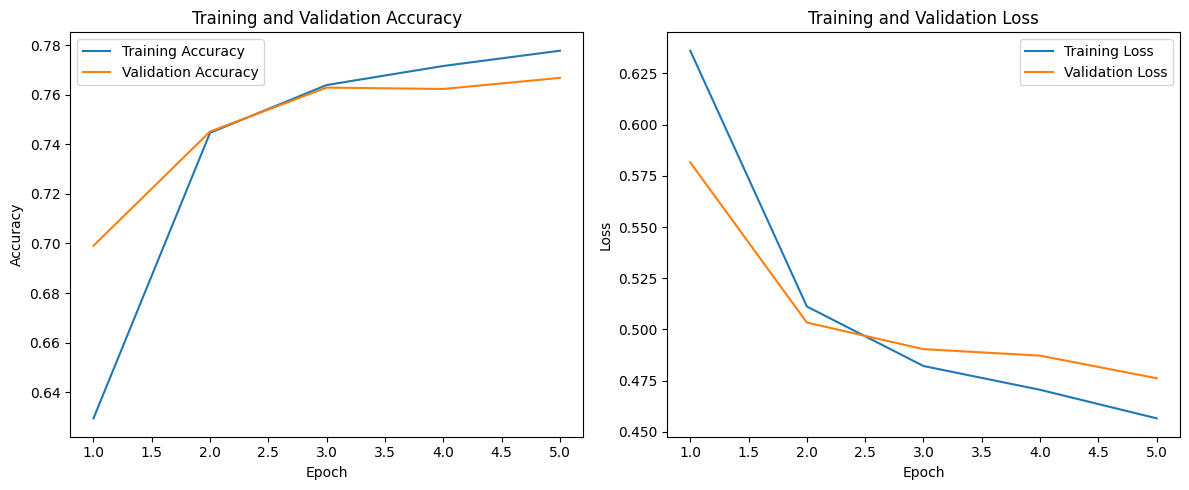

782/782 [==============================] - 25s 32ms/step - loss: 0.4762 - accuracy: 0.7668
Refined Model - Test loss: 0.4762, Test accuracy: 0.7668


In [ ]:
# Build the refined model with ReLU activation
model_refined = Sequential()
model_refined.add(Embedding(max_features, 32, input_length=maxlen))
model_refined.add(SimpleRNN(32, activation='relu'))
model_refined.add(Dense(num_classes, activation='softmax'))

model_refined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure time taken for training
start_time = time.time()

# Train the refined model
history_refined = model_refined.fit(x_train_processed, y_train, epochs=5, batch_size=batch_size, validation_data=(x_test_processed, y_test))

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plotting training history
epochs_refined = range(1, len(history_refined.history['accuracy']) + 1)

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot training history for the refined model - Accuracy
axs[0].plot(epochs_refined, history_refined.history['accuracy'], label='Training Accuracy')
axs[0].plot(epochs_refined, history_refined.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot training history for the refined model - Loss
axs[1].plot(epochs_refined, history_refined.history['loss'], label='Training Loss')
axs[1].plot(epochs_refined, history_refined.history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# Evaluate the refined model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)

# Print the evaluation results
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")

Epoch 1/5
782/782 [==============================] - 464s 588ms/step - loss: 0.6537 - accuracy: 0.6365 - val_loss: 0.5157 - val_accuracy: 0.7444
Epoch 2/5
782/782 [==============================] - 453s 580ms/step - loss: 0.5350 - accuracy: 0.7344 - val_loss: 0.5008 - val_accuracy: 0.7529
Epoch 3/5
782/782 [==============================] - 437s 559ms/step - loss: 0.5088 - accuracy: 0.7540 - val_loss: 0.5388 - val_accuracy: 0.7481
Epoch 4/5
782/782 [==============================] - 437s 560ms/step - loss: 0.4899 - accuracy: 0.7651 - val_loss: 0.4876 - val_accuracy: 0.7633
Epoch 5/5
782/782 [==============================] - 434s 556ms/step - loss: 0.4795 - accuracy: 0.7729 - val_loss: 0.4819 - val_accuracy: 0.7683
Total time taken to train the model: 57.30 minutes


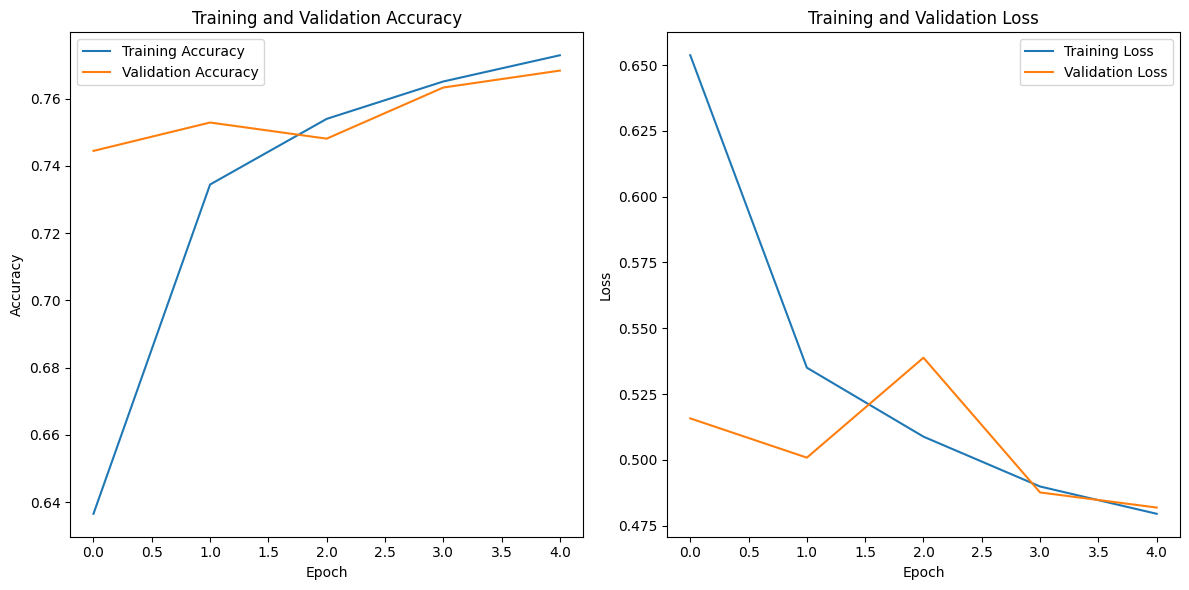

782/782 [==============================] - 95s 122ms/step - loss: 0.4819 - accuracy: 0.7683
Refined Model - Test loss: 0.4819, Test accuracy: 0.7683


In [ ]:
# Replace the single-layer simple RNN with two and three layers
model_refined = Sequential()
model_refined.add(Embedding(max_features, 32, input_length=maxlen))
model_refined.add(SimpleRNN(64, activation='relu', return_sequences=True))
model_refined.add(SimpleRNN(32, activation='relu', return_sequences=True))
model_refined.add(SimpleRNN(16, activation='relu'))
model_refined.add(Dropout(0.2))
model_refined.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_refined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_refined.fit(x_train_processed, y_train, epochs=5, batch_size=32, validation_data=(x_test_processed, y_test))

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")

Epoch 1/5
782/782 [==============================] - 89s 99ms/step - loss: 0.8112 - accuracy: 0.5038 - val_loss: 0.7810 - val_accuracy: 0.5852
Epoch 2/5
782/782 [==============================] - 82s 104ms/step - loss: 4.6283 - accuracy: 0.6498 - val_loss: 0.5952 - val_accuracy: 0.7029
Epoch 3/5
782/782 [==============================] - 84s 107ms/step - loss: 0.5723 - accuracy: 0.7122 - val_loss: 0.5249 - val_accuracy: 0.7304
Epoch 4/5
782/782 [==============================] - 83s 106ms/step - loss: 0.5448 - accuracy: 0.7320 - val_loss: 0.4972 - val_accuracy: 0.7594
Epoch 5/5
782/782 [==============================] - 82s 105ms/step - loss: 0.5326 - accuracy: 0.7418 - val_loss: 0.4988 - val_accuracy: 0.7587
Total time taken to train the model: 7.55 minutes


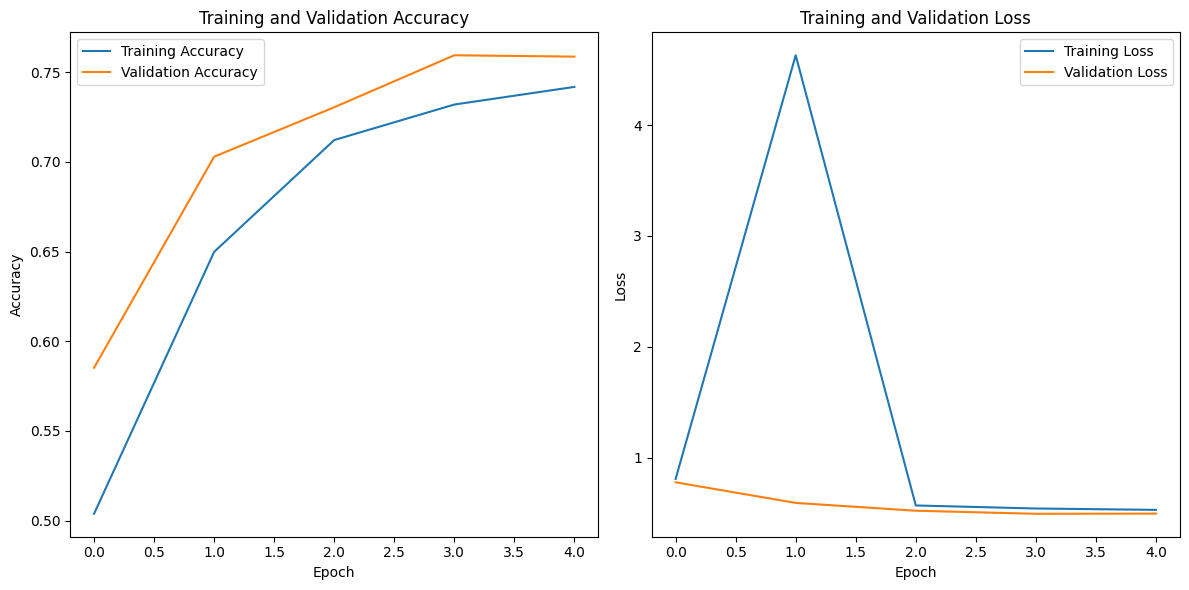

782/782 [==============================] - 18s 23ms/step - loss: 0.4988 - accuracy: 0.7587
Refined Model - Test loss: 0.4988, Test accuracy: 0.7587


In [ ]:
# Update the 3 RNN Layers with the 3 LSTM layers
model_refined = Sequential()
model_refined.add(Embedding(max_features, 32, input_length=maxlen))
model_refined.add(LSTM(64, activation='relu', return_sequences=True))
model_refined.add(LSTM(32, activation='relu', return_sequences=True))
model_refined.add(LSTM(16, activation='relu'))
model_refined.add(Dropout(0.5))
model_refined.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_refined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure time taken for training
start_time = time.time()

# Train the model
history = model_refined.fit(x_train_processed, y_train, epochs=5, batch_size=32, validation_data=(x_test_processed, y_test))

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")

Epoch 1/5
782/782 [==============================] - 86s 101ms/step - loss: 0.6485 - accuracy: 0.6160 - val_loss: 0.4980 - val_accuracy: 0.7561
Epoch 2/5
782/782 [==============================] - 78s 100ms/step - loss: 0.5033 - accuracy: 0.7534 - val_loss: 0.4722 - val_accuracy: 0.7681
Epoch 3/5
782/782 [==============================] - 83s 107ms/step - loss: 0.4822 - accuracy: 0.7678 - val_loss: 0.4618 - val_accuracy: 0.7747
Epoch 4/5
782/782 [==============================] - 76s 97ms/step - loss: 0.4661 - accuracy: 0.7769 - val_loss: 0.4546 - val_accuracy: 0.7786
Epoch 5/5
782/782 [==============================] - 79s 101ms/step - loss: 0.4532 - accuracy: 0.7815 - val_loss: 0.4559 - val_accuracy: 0.7814
Total time taken to train the model: 7.49 minutes


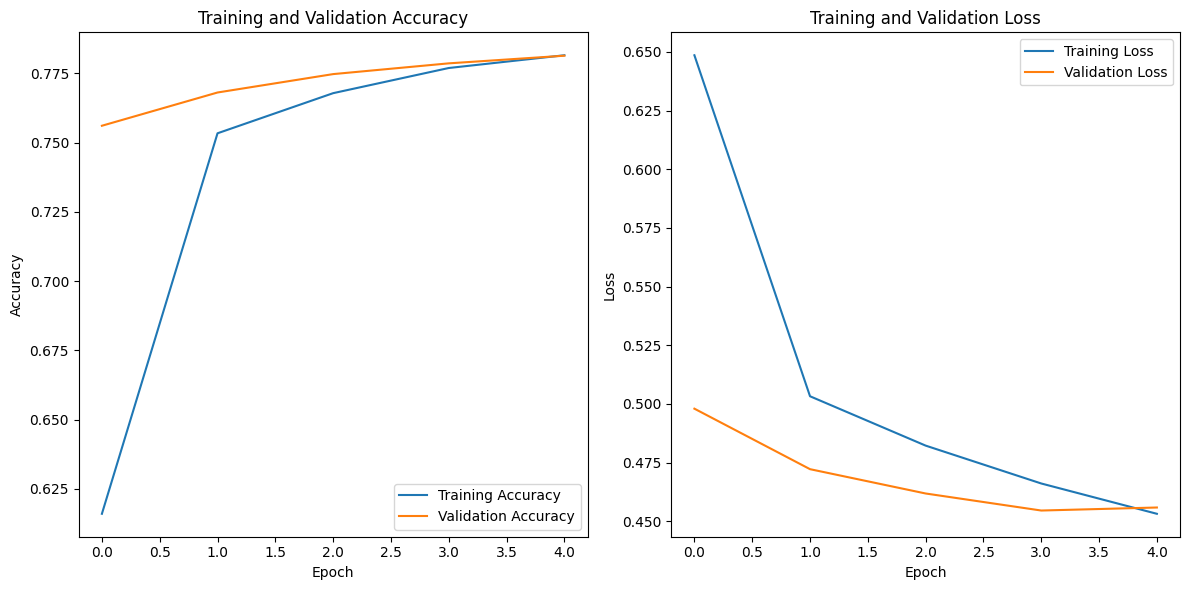

782/782 [==============================] - 16s 20ms/step - loss: 0.4559 - accuracy: 0.7814
Refined Model - Test loss: 0.4559, Test accuracy: 0.7814


In [ ]:
# Update the 3 LSTM Layers with the 3 GRU layers
model_refined = Sequential()
model_refined.add(Embedding(max_features, 32, input_length=maxlen))
model_refined.add(GRU(64, activation='relu', return_sequences=True))
model_refined.add(GRU(32, activation='relu', return_sequences=True))
model_refined.add(GRU(16, activation='relu'))
model_refined.add(Dropout(0.2))
model_refined.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_refined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure time taken for training
start_time = time.time()

# Train the model
history = model_refined.fit(x_train_processed, y_train, epochs=5, batch_size=32, validation_data=(x_test_processed, y_test))

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")

Epoch 1/5
782/782 [==============================] - 176s 209ms/step - loss: 0.5980 - accuracy: 0.6619 - val_loss: 0.5055 - val_accuracy: 0.7450
Epoch 2/5
782/782 [==============================] - 157s 201ms/step - loss: 0.4836 - accuracy: 0.7616 - val_loss: 0.4676 - val_accuracy: 0.7724
Epoch 3/5
782/782 [==============================] - 157s 201ms/step - loss: 0.4622 - accuracy: 0.7765 - val_loss: 0.4587 - val_accuracy: 0.7771
Epoch 4/5
782/782 [==============================] - 138s 177ms/step - loss: 0.4511 - accuracy: 0.7828 - val_loss: 0.4537 - val_accuracy: 0.7866
Epoch 5/5
782/782 [==============================] - 155s 199ms/step - loss: 0.4353 - accuracy: 0.7935 - val_loss: 0.4544 - val_accuracy: 0.7856
Total time taken to train the model: 13.07 minutes


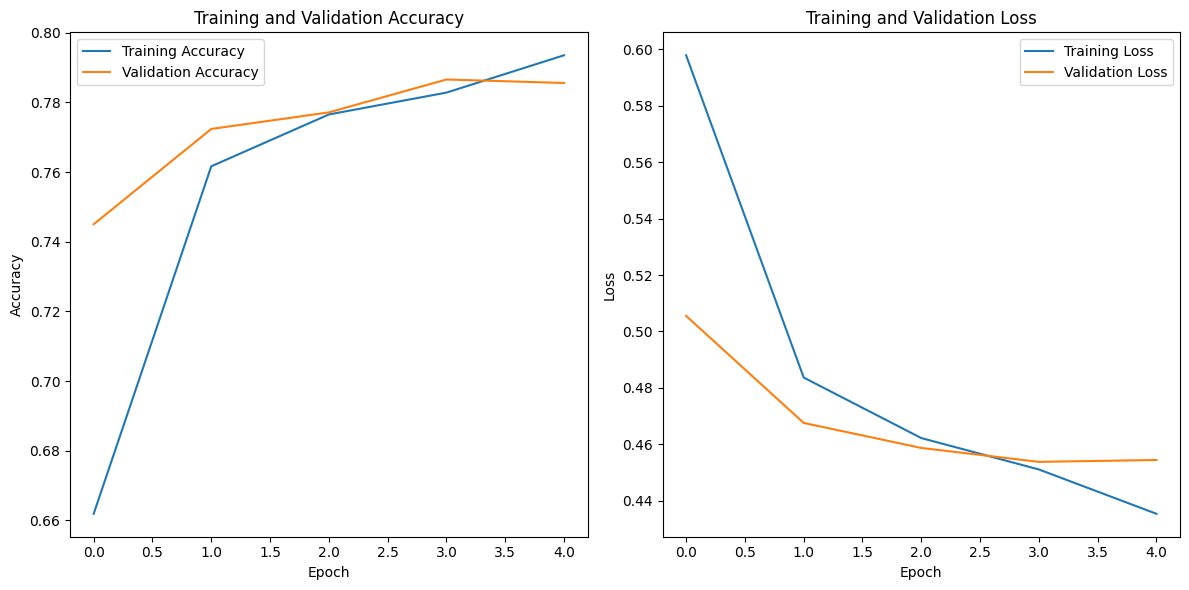

782/782 [==============================] - 31s 39ms/step - loss: 0.4544 - accuracy: 0.7856
Refined Model - Test loss: 0.4544, Test accuracy: 0.7856


In [ ]:
# Update the 3 GRU Layers with the 3 Bi-DirectionalRNN layers

model_refined = Sequential()
model_refined.add(Embedding(max_features, 32, input_length=maxlen))
model_refined.add(Bidirectional(GRU(64, activation='relu', return_sequences=True)))
model_refined.add(Bidirectional(GRU(32, activation='relu', return_sequences=True)))
model_refined.add(Bidirectional(GRU(16, activation='relu')))
model_refined.add(Dropout(0.2))
model_refined.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_refined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure time taken for training
start_time = time.time()

# Train the model
history = model_refined.fit(x_train_processed, y_train, epochs=5, batch_size=32, validation_data=(x_test_processed, y_test))

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss_refined, accuracy_refined = model_refined.evaluate(x_test_processed, y_test)
print(f"Refined Model - Test loss: {loss_refined:.4f}, Test accuracy: {accuracy_refined:.4f}")


In [ ]:
pip install transformers datasets tokenizers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset

In [ ]:
# Load sentiment dataset from Hugging Face
dataset = load_dataset("imdb")

# Extract features and labels
texts = dataset['train']['text']
labels = dataset['train']['label']

# Convert labels to numerical format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Tokenize using BERT tokenizer with a maximum sequence length
max_sequence_length = 128
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_inputs = tokenizer(texts, padding=True, truncation=True, max_length=max_sequence_length, return_tensors="tf")

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    tokenized_inputs['input_ids'].numpy(), labels_encoded, test_size=0.2, random_state=42
)

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Epoch 1/3
500/500 [==============================] - 115s 203ms/step - loss: 0.6314 - accuracy: 0.6367 - val_loss: 0.6419 - val_accuracy: 0.6700
Epoch 2/3
500/500 [==============================] - 95s 190ms/step - loss: 0.4979 - accuracy: 0.7649 - val_loss: 0.4422 - val_accuracy: 0.7915
Epoch 3/3
157/157 [==============================] - 8s 39ms/step - loss: 0.4623 - accuracy: 0.8032
Fine-tuned Model - Test loss: 0.4623, Test accuracy: 0.8032


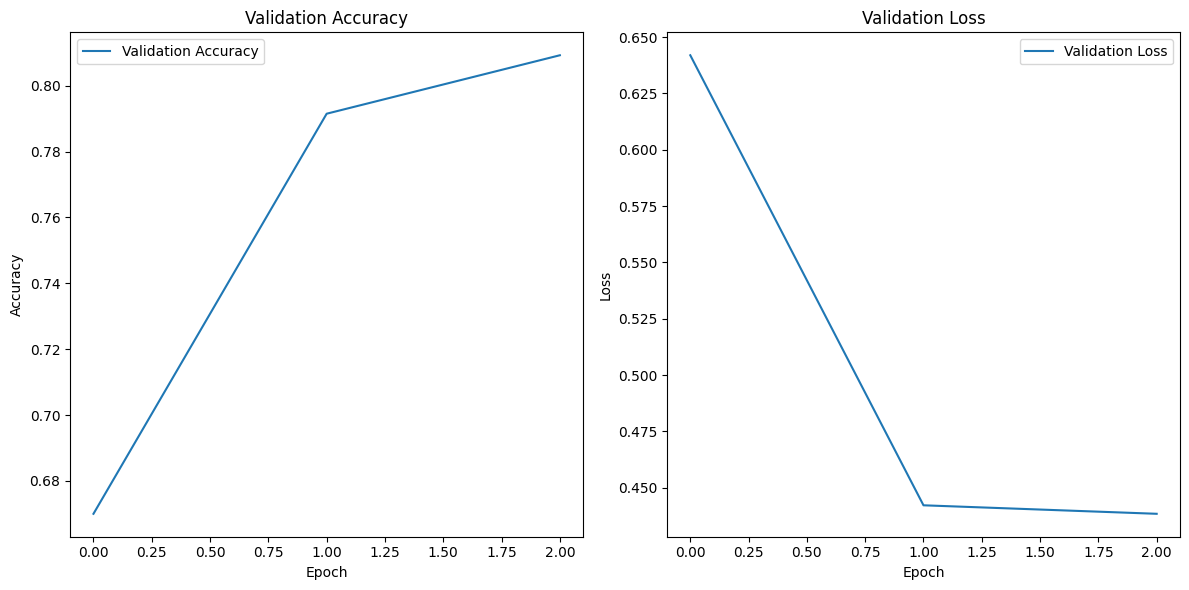

In [ ]:
# Reduce model complexity
model_custom = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.get_vocab()), output_dim=32, input_length=max_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layersDense(num_classes, activation='softmax')
])

# Compile the model
model_custom.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set mixed precision policy
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Fine-tune the model on your data with mixed precision
history = model_custom.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the fine-tuned model on the test set
loss_finetuned, accuracy_finetuned = model_custom.evaluate(x_test, y_test)
print(f"Fine-tuned Model - Test loss: {loss_finetuned:.4f}, Test accuracy: {accuracy_finetuned:.4f}")

# Calculate and print the total time taken
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to train the model: {total_time / 60:.2f} minutes")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

